In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib

print("Hello World")

Hello World


#

In [3]:
bike_data = pd.read_csv("seoule_bike_2018_2019.csv", encoding="cp949")

bike_data

,대여일자,대여건수,평균기온,강수량,요일
0,2018-01-01,4950,-1.3,NaN,월
1,2018-01-02,7136,-1.8,NaN,화
2,2018-01-03,7156,-4.7,NaN,수
3,2018-01-04,7102,-4.7,NaN,목
4,2018-01-05,7705,-3.0,NaN,금
...,...,...,...,...,...
450,2019-03-27,35832,11.6,NaN,수
451,2019-03-28,38806,9.4,NaN,목
452,2019-03-29,43893,9.2,NaN,금
453,2019-03-30,14001,5.2,1.8,토


# 데이터 전처리

In [7]:
df_bike = bike_data.fillna(0) # 강수량 결측치 처리
df_bike

,대여일자,대여건수,평균기온,강수량,요일
0,2018-01-01,4950,-1.3,0.0,월
1,2018-01-02,7136,-1.8,0.0,화
2,2018-01-03,7156,-4.7,0.0,수
3,2018-01-04,7102,-4.7,0.0,목
4,2018-01-05,7705,-3.0,0.0,금
...,...,...,...,...,...
450,2019-03-27,35832,11.6,0.0,수
451,2019-03-28,38806,9.4,0.0,목
452,2019-03-29,43893,9.2,0.0,금
453,2019-03-30,14001,5.2,1.8,토


In [9]:
plt.rc("font", family="Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

#  폰트 깨짐 처리

In [11]:
one_hot_week = pd.get_dummies(df_bike["요일"])
# get_dummies() 함수는 원핫인코딩 해준다.

df_bike_new = pd.concat([df_bike, one_hot_week], axis=1)
# 원핫 인코딩된 요일 df를 기존df에 붙여준다.
# 이때 axis를 1로 주면 열로 붙인다

df_bike_new.drop(["대여일자"], axis = 1, inplace=True)
df_bike_new.drop(["요일"], axis = 1, inplace=True)
# 필요 없는 대여 일자와 요일은 지워준다

df_bike_new

,대여건수,평균기온,강수량,금,목,수,월,일,토,화
0,4950,-1.3,0.0,0,0,0,1,0,0,0
1,7136,-1.8,0.0,0,0,0,0,0,0,1
2,7156,-4.7,0.0,0,0,1,0,0,0,0
3,7102,-4.7,0.0,0,1,0,0,0,0,0
4,7705,-3.0,0.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
450,35832,11.6,0.0,0,0,1,0,0,0,0
451,38806,9.4,0.0,0,1,0,0,0,0,0
452,43893,9.2,0.0,1,0,0,0,0,0,0
453,14001,5.2,1.8,0,0,0,0,0,1,0


In [15]:
data_input = df_bike_new.drop(["대여건수"], axis=1)
print(data_input.shape)
data_input

(455, 9)


,평균기온,강수량,금,목,수,월,일,토,화
0,-1.3,0.0,0,0,0,1,0,0,0
1,-1.8,0.0,0,0,0,0,0,0,1
2,-4.7,0.0,0,0,1,0,0,0,0
3,-4.7,0.0,0,1,0,0,0,0,0
4,-3.0,0.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
450,11.6,0.0,0,0,1,0,0,0,0
451,9.4,0.0,0,1,0,0,0,0,0
452,9.2,0.0,1,0,0,0,0,0,0
453,5.2,1.8,0,0,0,0,0,1,0


In [16]:
data_target = df_bike["대여건수"]
print(data_target.shape)
data_target

(455,)


0       4950
1       7136
2       7156
3       7102
4       7705
       ...  
450    35832
451    38806
452    43893
453    14001
454    22326
Name: 대여건수, Length: 455, dtype: int64

# 모델 학습

In [17]:
from sklearn.model_selection import train_test_split

input_train, input_test, target_train, target_test = train_test_split(data_input, data_target, shuffle=True)

print(input_train.shape, target_train.shape)
print(input_test.shape, target_test.shape)

(341, 9) (341,)
(114, 9) (114,)


In [18]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(input_train, target_train)

LinearRegression()

In [21]:
# 모델 평가

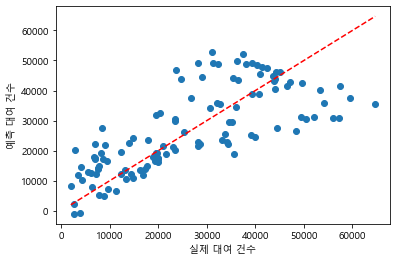

In [19]:
x = np.arange(np.min(target_test), np.max(target_test) + 1)

plt.plot(x, x, "r--")
#

plt.scatter(target_test, model_lr.predict(input_test))
# 실제 값, 예측한 값을 비교한다.

plt.xlabel("실제 대여 건수")
plt.ylabel("예측 대여 건수")

plt.show()

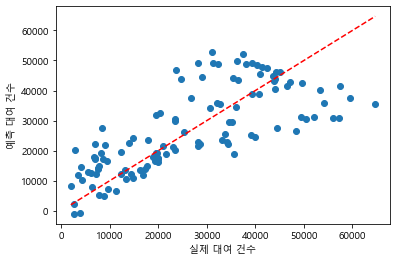

In [20]:
x = np.arange(np.min(target_test), np.max(target_test) + 1)

plt.plot(x, x, "r--")
#

plt.scatter(target_test, model_lr.predict(input_test))
# 실제 값, 예측한 값을 비교한다.

plt.xlabel("실제 대여 건수")
plt.ylabel("예측 대여 건수")

plt.show()

# 모델 저장

In [24]:
from sklearn import datasets
import pickle

print("Hello World")

Hello World


In [34]:
f = open("./to_day_SEOUL_BIKE.pkl", "wb")
save_model = pickle.dump(model_lr, f)
f.close()
